In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from because.probability import prob

from because.synth import read_data
from because.visualization import viz

In [2]:
df = pd.read_csv('/home/arun/Desktop/dataset/Housing/housing.csv')
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'type', 'sqfeet', 'beds',
       'baths', 'cats_allowed', 'dogs_allowed', 'smoking_allowed',
       'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished',
       'laundry_options', 'parking_options', 'image_url', 'description', 'lat',
       'long', 'state'],
      dtype='object')

In [3]:
df.head()

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7041509589,https://auburn.craigslist.org/apa/d/columbus-s...,auburn,https://auburn.craigslist.org,699,apartment,1013,3,1.0,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00w0w_1zlqXj6OQz...,"There's no need to sacrifice living space, ame...",32.4352,-85.0018,al
1,7047415699,https://auburn.craigslist.org/apa/d/columbus-w...,auburn,https://auburn.craigslist.org,636,apartment,828,2,1.0,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00I0I_iWLAuA9DRT...,"There's no need to sacrifice living space, ame...",32.4352,-85.0018,al
2,7036692376,https://auburn.craigslist.org/apa/d/auburn-uni...,auburn,https://auburn.craigslist.org,414,apartment,1214,4,2.0,1,...,0,0,0,w/d in unit,NaN,https://images.craigslist.org/00Y0Y_lyK5nETAHr...,"At The Hub at Auburn, we know it's important t...",32.6149,-85.5080,al
3,7047498375,https://auburn.craigslist.org/apa/d/valley-24-...,auburn,https://auburn.craigslist.org,825,apartment,1107,2,2.0,1,...,0,0,0,w/d hookups,NaN,https://images.craigslist.org/00k0k_jBZeOy3w6e...,Details: Beds: 2 Baths: 2 Sqft: 1107 Rent: $82...,32.8113,-85.1749,al
4,7039492462,https://auburn.craigslist.org/apa/d/columbus-r...,auburn,https://auburn.craigslist.org,624,apartment,828,2,1.0,1,...,0,0,0,NaN,NaN,https://images.craigslist.org/00N0N_YOvUJIICBS...,"There's no need to sacrifice living space, ame...",32.4352,-85.0018,al


In [4]:
df1 = df[['price', 'beds', 'baths', 'sqfeet', 'type']]
df1.shape

(384977, 5)

In [5]:
# Applying filters
df2 = df1[(df1['price'] >= 500) & (df1['price'] <= 3000)]
df2 = df2[(df2['beds'] >= 1) & (df2['beds'] <= 4)]
df2 = df2[(df2['sqfeet'] >= 500) & (df2['sqfeet'] <= 3000)]
df2 = df2[(df2['baths'] >= 1) & (df2['baths'] <= 4)]
df2.shape

(348244, 5)

In [6]:
df2.to_csv('/home/arun/Desktop/dataset/Housing/housing_new.csv', index=False)

In [7]:
r = read_data.Reader('/home/arun/Desktop/dataset/Housing/housing_new.csv')
ds = r.read()

ps = prob.ProbSpace(ds)
ps1 = ps.SubSpace([('type', 'house')], power=5)

getData:  348244 records read.


In [8]:
ps.getVarNames()

['price', 'beds', 'baths', 'sqfeet', 'type']

# Step 1: Single Variable Distribution

Viz.show: Target =  [('price',), ('beds',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['price', 'beds']


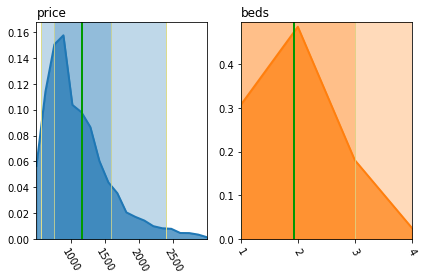

Viz.show: Target =  [('baths',), ('sqfeet',)] , Condition =  []
Viz.show: Showing graph =  Multi Variable PDF Plot , power =  None
vars =  ['baths', 'sqfeet']


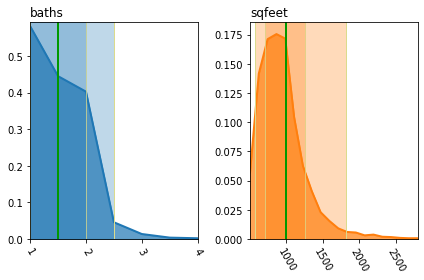

In [34]:
%matplotlib inline
viz.show(probspace=ps, targetSpec=[('price'),('beds')], condSpec=[], gtype='multi')
viz.show(probspace=ps, targetSpec=[('baths'),('sqfeet')], condSpec=[], gtype='multi')

In [35]:
for i in ps.getVarNames():
    print(i, ps.E(i))

price 1166.0781176416535
beds 1.9247108349318294
baths 1.4911886493378206
sqfeet 998.9906473621943
type apartment


# Pairwise Distribution

## Price vs Baths

Viz.show: Target =  [('price',)] , Condition =  [('baths',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  0.301


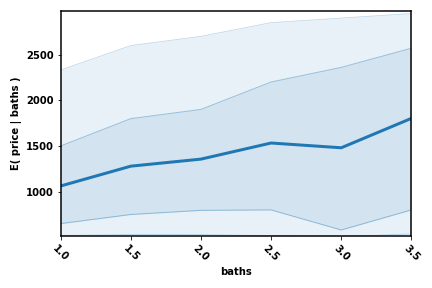

In [162]:
viz.show(probspace=ps1, targetSpec=['price'], condSpec=['baths'], gtype='exp')

## Price vs Beds

Viz.show: Target =  [('price',)] , Condition =  [('beds',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  0.19


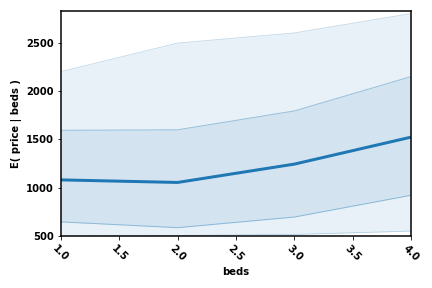

In [161]:
viz.show(probspace=ps1, targetSpec=['price'], condSpec=['beds'], gtype='exp')

## Price vs Sqfeet

Viz.show: Target =  [('price',)] , Condition =  [('sqfeet',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  1.388


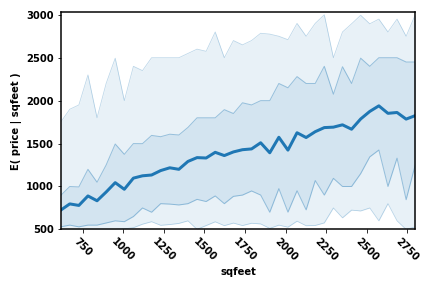

In [160]:
viz.show(probspace=ps1, targetSpec=['price'], condSpec=['sqfeet'], gtype='exp')

## Price vs Type

Viz.show: Target =  [('price',)] , Condition =  [('type',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  10.028


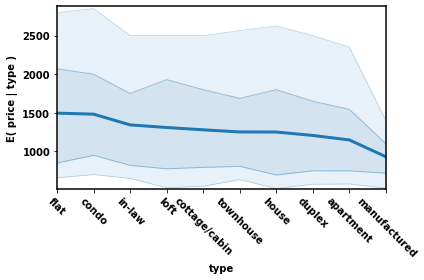

In [42]:
viz.show(probspace=ps, targetSpec=['price'], condSpec=['type'], gtype='exp')

## Beds vs Baths

Viz.show: Target =  [('beds',)] , Condition =  [('baths',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  0.305


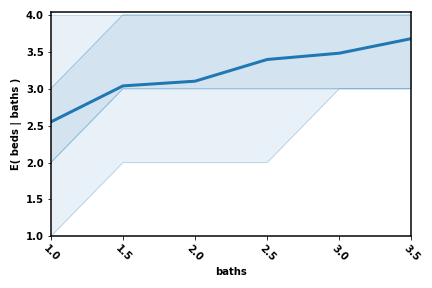

Viz.show: Target =  [('baths',)] , Condition =  [('beds',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  0.234


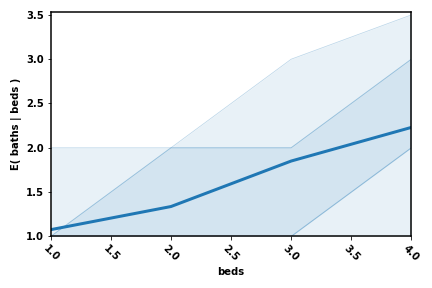

In [159]:
viz.show(probspace=ps1, targetSpec=['beds'], condSpec=['baths'], gtype='exp')
viz.show(probspace=ps1, targetSpec=['baths'], condSpec=['beds'], gtype='exp')

## Beds vs Types

Viz.show: Target =  [('beds',)] , Condition =  [('type',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  9.497


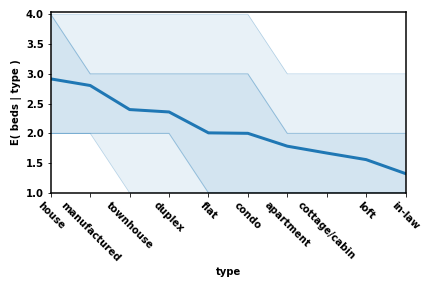

In [158]:
viz.show(probspace=ps, targetSpec=['beds'], condSpec=['type'], gtype='exp')

## Beds vs Sqfeet

Viz.show: Target =  [('beds',)] , Condition =  [('sqfeet',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  1.411


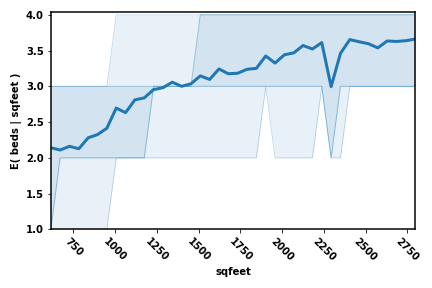

In [156]:
viz.show(probspace=ps1, targetSpec=['beds'], condSpec=['sqfeet'], gtype='exp')

## Baths vs Sqfeet

Viz.show: Target =  [('baths',)] , Condition =  [('sqfeet',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  40
Elapsed Time =  1.501


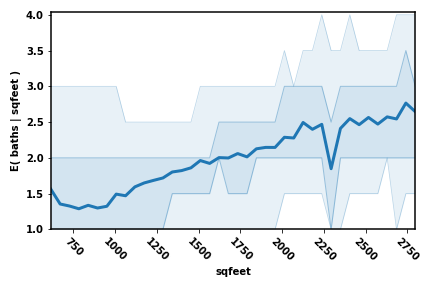

In [155]:
viz.show(probspace=ps1, targetSpec=['baths'], condSpec=['sqfeet'], gtype='exp')

## Baths vs Type

Viz.show: Target =  [('baths',)] , Condition =  [('type',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  10.081


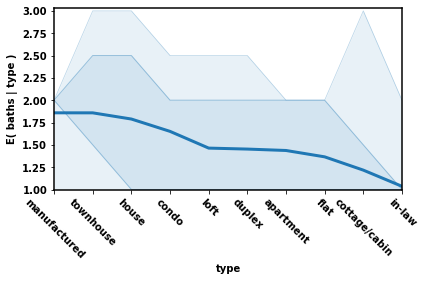

In [47]:
viz.show(probspace=ps, targetSpec=['baths'], condSpec=['type'], gtype='exp')

## Sqfeet vs Type

Viz.show: Target =  [('sqfeet',)] , Condition =  [('type',)]
Viz.show: Showing graph =  2D Expected value plot with single condition , power =  None
Dimensions =  2 .  Conditionals =  1
Number of points to test for each conditional =  50
Elapsed Time =  10.948


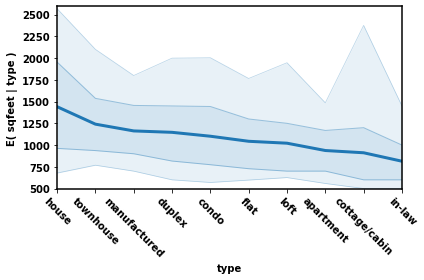

In [48]:
viz.show(probspace=ps, targetSpec=['sqfeet'], condSpec=['type'], gtype='exp')

Viz.show: Target =  [('price',)] , Condition =  [('beds',), ('baths',)]
Viz.show: Showing graph =  3-variable Probability Distribution plot. , power =  1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


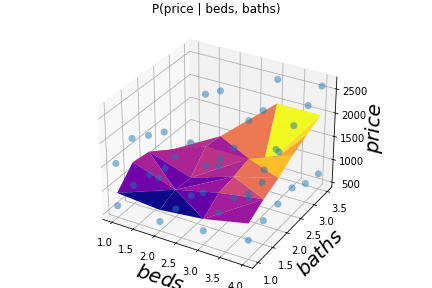

In [163]:
%matplotlib widget
viz.show(probspace=ps1, targetSpec=['price'], condSpec=['beds', 'baths'], power =1, gtype='pdf')

Viz.show: Target =  [('sqfeet',)] , Condition =  [('beds',), ('baths',)]
Viz.show: Showing graph =  3-variable Probability Distribution plot. , power =  1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


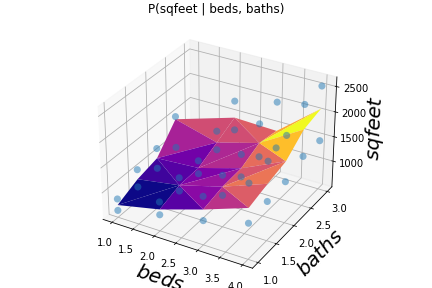

In [57]:
%matplotlib widget
viz.show(probspace=ps, targetSpec=['sqfeet'], condSpec=['beds', 'baths'], power =1, gtype='pdf')

In [154]:
# price, beds, baths, sqfeet, type
print(ps1.isIndependent('baths', 'price', givenSpecs=['beds', 'sqfeet'], seed=123, sensitivity=10))

False


# Causal Model House Type

House Type only

In [9]:
ps1.testDirection('price', 'beds', power=2)

0.7114696995869542

In [13]:
for i in ps1.getVarNames():
    if i != 'price':
        print(i, ps1.testDirection('price', i, power=2))

beds 0.7114696995869542
baths 0.5751467994625712
sqfeet -0.2723567961464668
type 0.0


In [14]:
for i in ps1.getVarNames():
    if i != 'beds':
        print(i, ps1.testDirection('beds', i, power=2))

price -0.7114696995869542
baths -0.5855424479676574
sqfeet -0.5325578371956441
type 0.0


In [15]:
for i in ps1.getVarNames():
    if i != 'baths':
        print(i, ps1.testDirection('baths', i, power=2))

price -0.5751467994625712
beds 0.5855424479676574
sqfeet -0.6037367157806195
type 0.0


In [16]:
for i in ps1.getVarNames():
    if i != 'sqfeet':
        print(i, ps1.testDirection('sqfeet', i, power=2))

price 0.2723567961464668
beds 0.5325578371956441
baths 0.6037367157806195
type 0.0


In [17]:
for i in ps1.getVarNames():
    if i != 'type':
        print(i, ps1.testDirection('type', i, power=2))

price 0.0
beds 0.0
baths 0.0
sqfeet 0.0


In [9]:
ps1.isIndependent('type', 'sqfeet')

True

## Causal Model only House Type

After testDirection, the causal model for the housing dataset, looks like this:

This is for the type = House only,

![CausalHouseType](imgs/CausalHouseType.png)

# Causal Model all types included

In [10]:
for i in ps.getVarNames():
    if i != 'price':
        print(i, ps.testDirection('price', i, power=2))

beds 0.6753872922497643
baths 0.6158408542491837
sqfeet -0.568995516165039
type 0.6141587062624855


In [11]:
for i in ps.getVarNames():
    if i != 'beds':
        print(i, ps.testDirection('beds', i, power=2))

price -0.6753872922497643
baths 0.0493567667918794
sqfeet -0.5606907921243207
type -0.7123066537305065


In [12]:
for i in ps.getVarNames():
    if i != 'baths':
        print(i, ps.testDirection('baths', i, power=2))

price -0.6158408542491837
beds -0.0493567667918794
sqfeet -0.24949218085589758
type -0.6776642751600568


In [13]:
for i in ps.getVarNames():
    if i != 'sqfeet':
        print(i, ps.testDirection('sqfeet', i, power=2))

price 0.568995516165039
beds 0.5606907921243207
baths 0.24949218085589758
type -0.07989208104646331


In [14]:
for i in ps.getVarNames():
    if i != 'type':
        print(i, ps.testDirection('type', i, power=2))

price -0.6141587062624855
beds 0.7123066537305065
baths 0.6776642751600568
sqfeet 0.07989208104646331


## Causal Model including all Types

When included all the types, the causal model looks like this:

![CausalHousingFinal](imgs/CausalHousingFinal.png)